Loading the libraries

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
print("successful")

successful


In [52]:
dem_df = pd.read_csv(r"C:\Users\chiso\Downloads\alzheimers_disease_data.csv")
demen_df = dem_df.copy()
demen_df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [53]:
demen_df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

### Descriptive analysis


In [54]:
demen_df.nunique()

PatientID                    2149
Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation

In [55]:
demen_df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [56]:
demen_df.duplicated().sum()

0

In [57]:
demen_df.shape

(2149, 35)

In [58]:
demen_df.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [59]:
demen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [60]:
demen_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientID,2149.0,NaN,NaN,NaN,5825.0,620.507185,4751.0,5288.0,5825.0,6362.0,6899.0
Age,2149.0,NaN,NaN,NaN,74.908795,8.990221,60.0,67.0,75.0,83.0,90.0
Gender,2149.0,NaN,NaN,NaN,0.506282,0.500077,0.0,0.0,1.0,1.0,1.0
Ethnicity,2149.0,NaN,NaN,NaN,0.697534,0.996128,0.0,0.0,0.0,1.0,3.0
EducationLevel,2149.0,NaN,NaN,NaN,1.286645,0.904527,0.0,1.0,1.0,2.0,3.0
BMI,2149.0,NaN,NaN,NaN,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,NaN,NaN,NaN,0.288506,0.453173,0.0,0.0,0.0,1.0,1.0
AlcoholConsumption,2149.0,NaN,NaN,NaN,10.039442,5.75791,0.002003,5.13981,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,NaN,NaN,NaN,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,NaN,NaN,NaN,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


### EXPLORATORY ANALYSIS

Univariate Analysis

In [61]:
len(demen_df.columns)

35

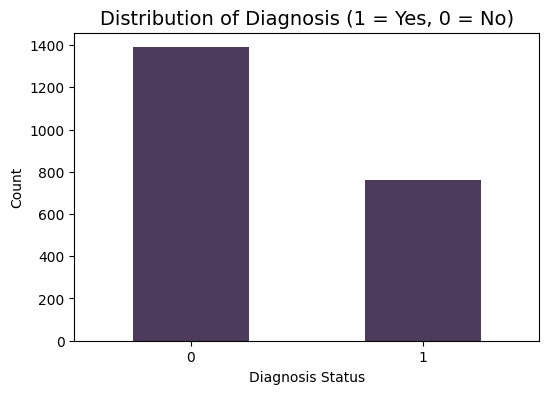

In [62]:
demen_df["Diagnosis"].value_counts().plot(kind="bar", figsize=(6,4), rot=0, color="#4d3b5c")
plt.title("Distribution of Diagnosis (1 = Yes, 0 = No)", fontsize=14)
plt.xlabel("Diagnosis Status")
plt.ylabel("Count")
plt.show()

In [63]:
demen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [64]:
histplot_data = ['Age','BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality','SleepQuality', 'SystolicBP',
                 'DiastolicBP', 'CholesterolTotal','CholesterolLDL', 'CholesterolHDL','CholesterolTriglycerides',
                 'MMSE', 'FunctionalAssessment','ADL' ]

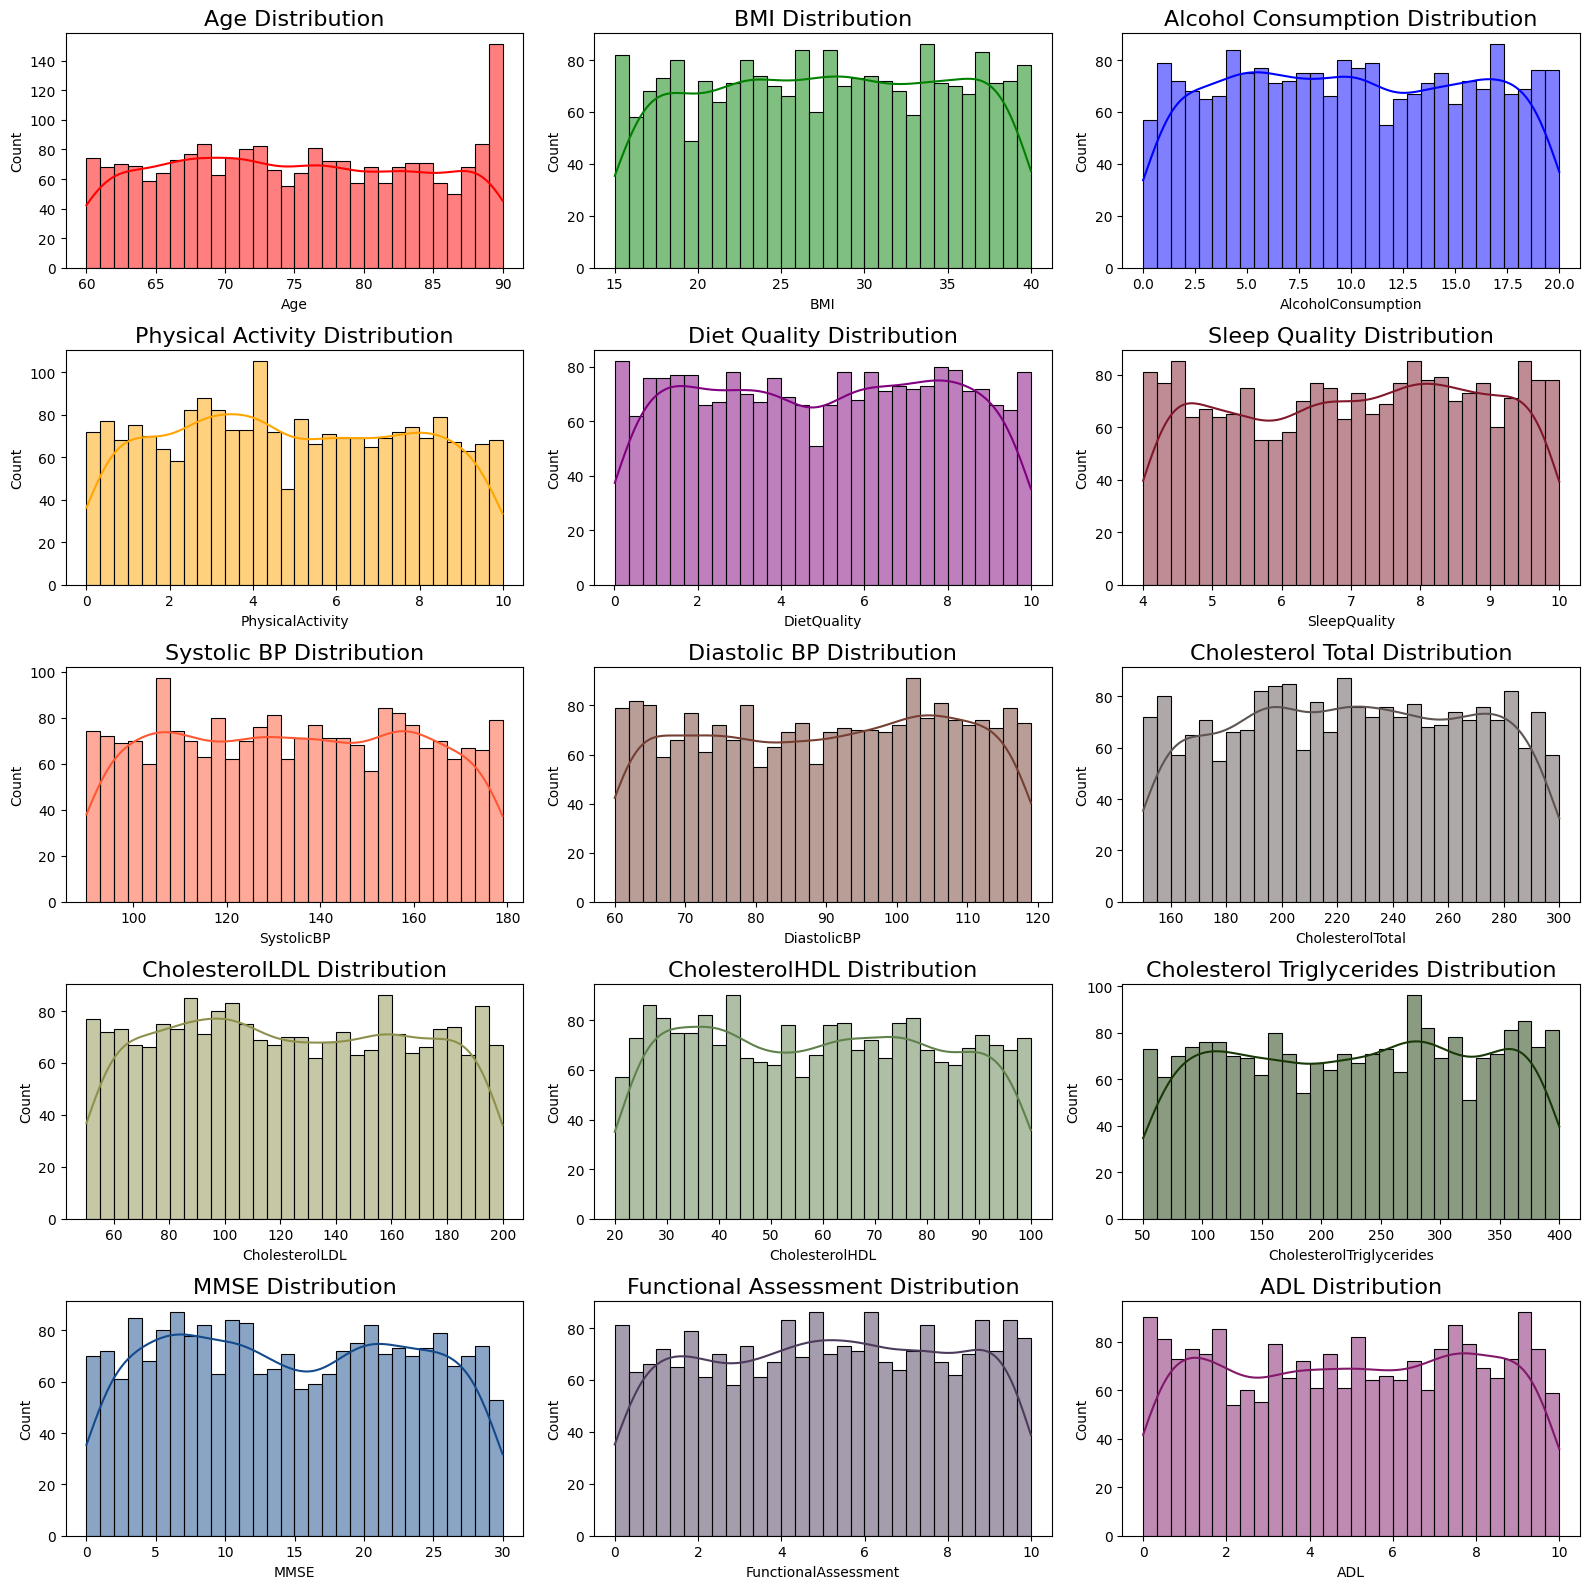

In [65]:
fig=plt.figure(figsize=(16, 16))  # Adjusted figsize for better layout

ax=fig.add_subplot(5, 3, 1)
sns.histplot(demen_df["Age"], color="red", label="Age", kde=True, bins=30, ax=ax)
ax.set_title('Age Distribution', fontsize=16)

ax=fig.add_subplot(5, 3, 2)
sns.histplot(demen_df['BMI'], color="green", label='BMI', bins=30, kde=True, ax=ax)
ax.set_title('BMI Distribution', fontsize=16)

ax=fig.add_subplot(5, 3, 3)
sns.histplot(demen_df['AlcoholConsumption'], color="blue", label='Alcohol Consumption',bins=30, kde=True, ax=ax)
ax.set_title('Alcohol Consumption Distribution', fontsize=16)

ax=fig.add_subplot(5, 3, 4)
sns.histplot(demen_df['PhysicalActivity'], color="orange", label='Physical Activity', kde=True, bins=30, ax=ax)
ax.set_title('Physical Activity Distribution', fontsize=16)

ax=fig.add_subplot(5, 3, 5)
sns.histplot(demen_df['DietQuality'], color="purple", label='Diet Quality', bins=30, kde=True, ax=ax)
ax.set_title('Diet Quality Distribution', fontsize=16)

ax=fig.add_subplot(5, 3, 6)
sns.histplot(demen_df["SleepQuality"], color="#81182a", label="Sleep Quality", kde=True, bins=30, ax=ax)
ax.set_title('Sleep Quality Distribution', fontsize=16)

ax=fig.add_subplot(5, 3, 7)
sns.histplot(demen_df['SystolicBP'], color="#ff5733", label='Systolic BP', bins=30, kde=True, ax=ax)
ax.set_title('Systolic BP Distribution', fontsize=16)

ax=fig.add_subplot(5, 3, 8)
sns.histplot(demen_df['DiastolicBP'], color="#753f33", label='Diastolic BP',bins=30, kde=True, ax=ax)
ax.set_title('Diastolic BP Distribution', fontsize=16)

ax=fig.add_subplot(5, 3, 9)
sns.histplot(demen_df['CholesterolTotal'], color="#5e5452", label='Cholesterol Total', kde=True, bins=30, ax=ax)
ax.set_title('Cholesterol Total Distribution', fontsize=16)

ax=fig.add_subplot(5, 3, 10)
sns.histplot(demen_df['CholesterolLDL'], color="#8f904b", label='CholesterolLDL', bins=30, kde=True, ax=ax)
ax.set_title('CholesterolLDL Distribution', fontsize=16)

ax=fig.add_subplot(5, 3, 11)
sns.histplot(demen_df["CholesterolHDL"], color="#5f814c", label="CholesterolHDL", kde=True, bins=30, ax=ax)
ax.set_title('CholesterolHDL Distribution', fontsize=16)

ax=fig.add_subplot(5, 3, 12)
sns.histplot(demen_df['CholesterolTriglycerides'], color="#193807", label='Cholesterol Triglycerides', bins=30, kde=True, ax=ax)
ax.set_title('Cholesterol Triglycerides Distribution', fontsize=16)

ax=fig.add_subplot(5, 3, 13)
sns.histplot(demen_df['MMSE'], color="#144a8c", label='MMSE',bins=30, kde=True, ax=ax)
ax.set_title('MMSE Distribution', fontsize=16)

ax=fig.add_subplot(5, 3, 14)
sns.histplot(demen_df['FunctionalAssessment'], color="#4d3b5c", label='Functional Assessment', kde=True, bins=30, ax=ax)
ax.set_title('Functional Assessment Distribution', fontsize=16)

ax=fig.add_subplot(5, 3, 15)
sns.histplot(demen_df['ADL'], color="#81186a", label='ADL', bins=30, kde=True, ax=ax)
ax.set_title('ADL Distribution', fontsize=16)

plt.tight_layout()  # To prevent overlapping of titles and axes
plt.show()


In [66]:
columns_list = list(demen_df.columns)

countplot_data = set(columns_list)-set(histplot_data)-set(['DoctorInCharge', 'PatientID', 'Diagnosis'])
countplot_data = list(countplot_data)
countplot_data

['Smoking',
 'Ethnicity',
 'Forgetfulness',
 'MemoryComplaints',
 'HeadInjury',
 'PersonalityChanges',
 'DifficultyCompletingTasks',
 'FamilyHistoryAlzheimers',
 'Hypertension',
 'EducationLevel',
 'Depression',
 'Confusion',
 'Gender',
 'Disorientation',
 'BehavioralProblems',
 'CardiovascularDisease',
 'Diabetes']

In [67]:
def count_plot(data, column):
    for col in column:
        sns.countplot(data= data, x = col, color= '#4d3b5c')
        plt.xlabel(col)
        plt.ylabel("Values")
        plt.title(f"Distribution of {col}")
        plt.show()

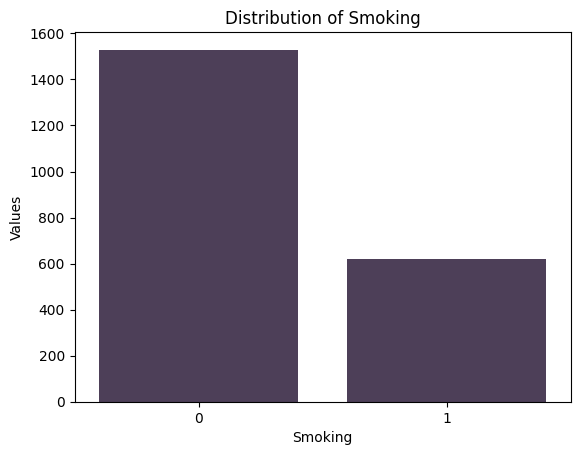

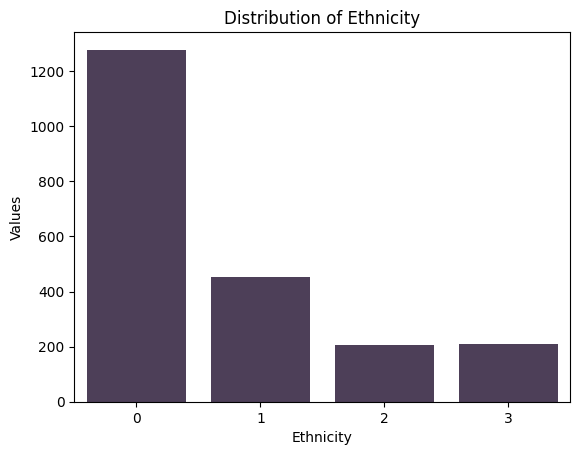

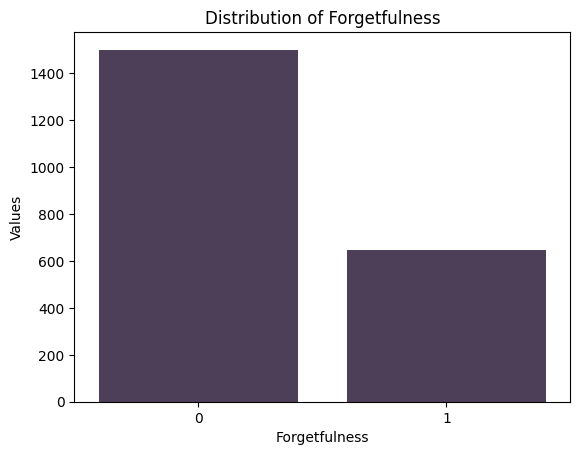

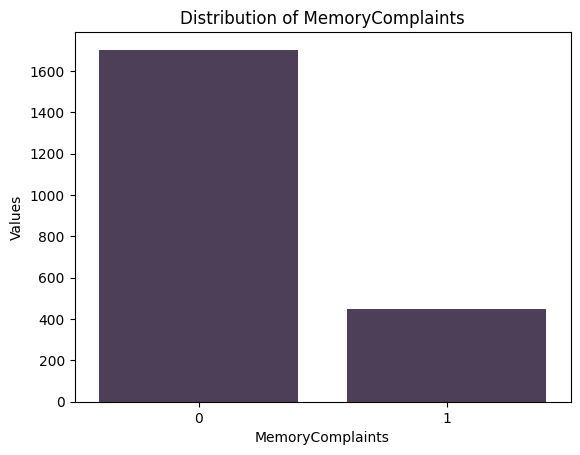

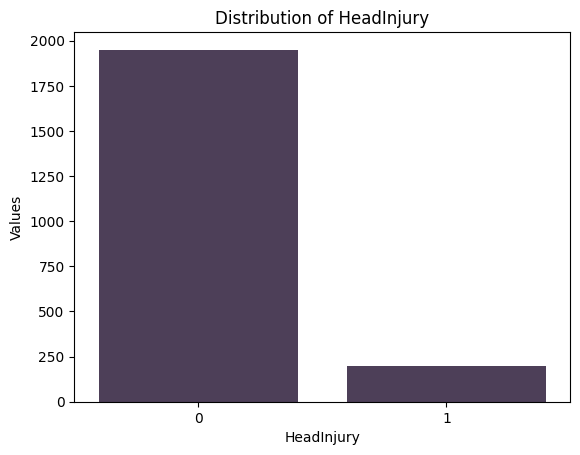

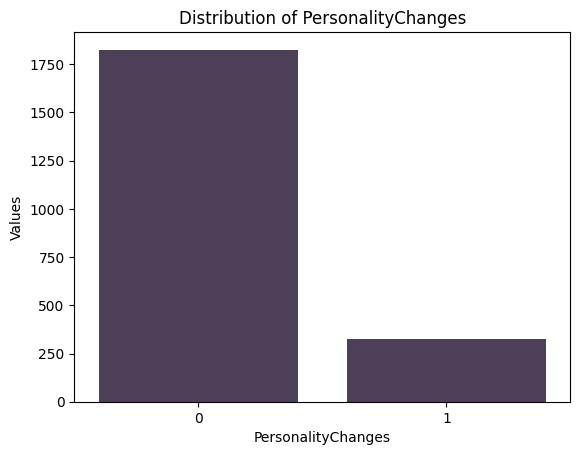

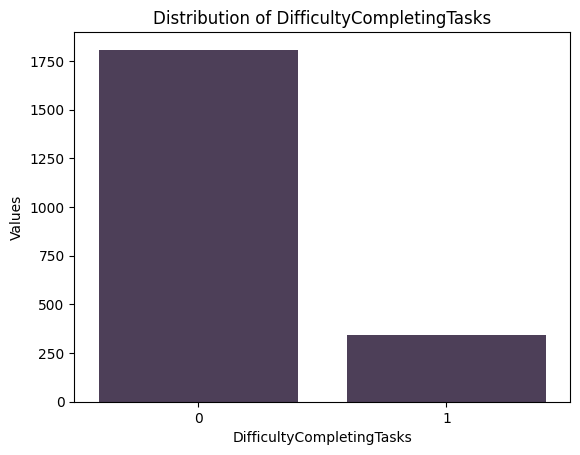

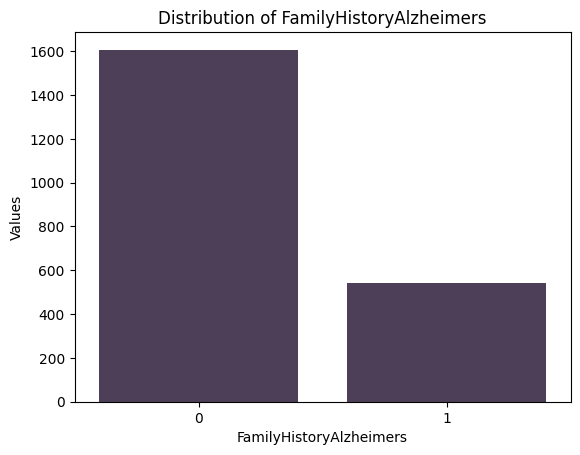

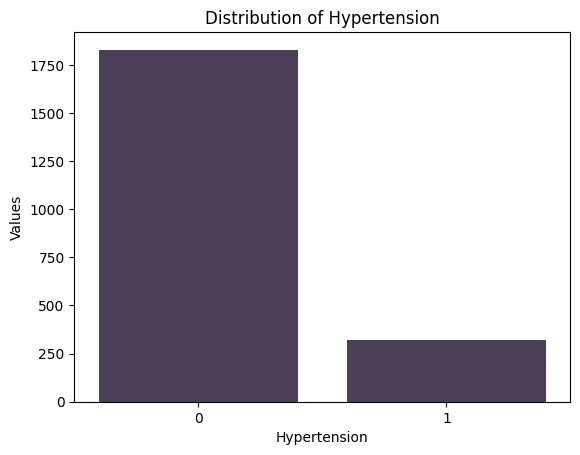

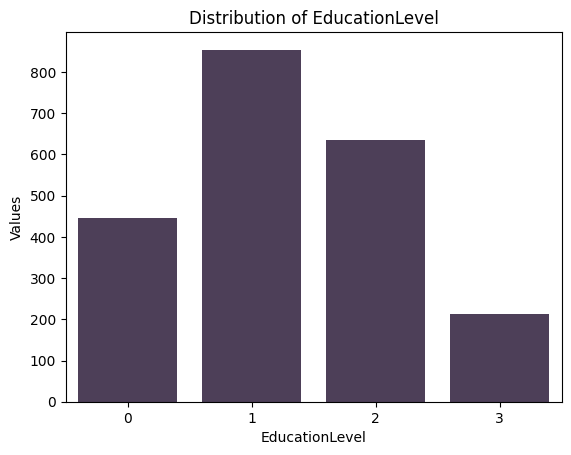

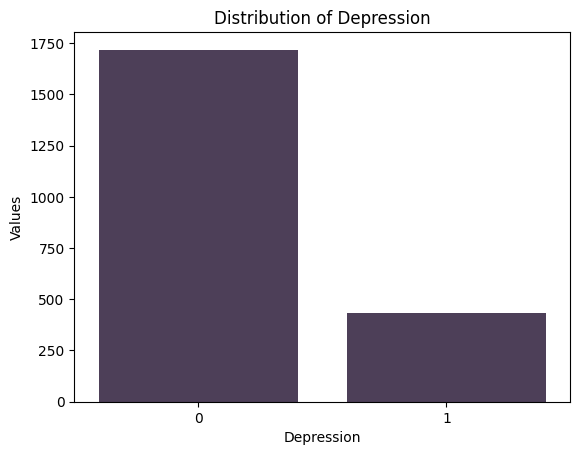

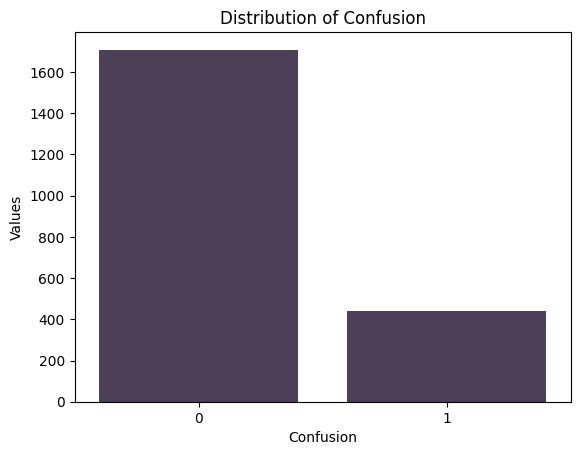

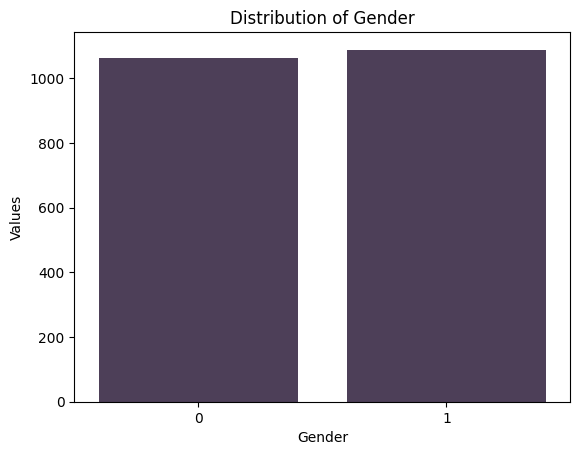

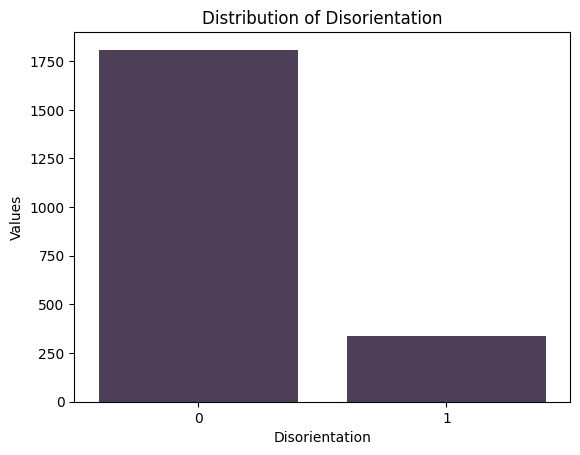

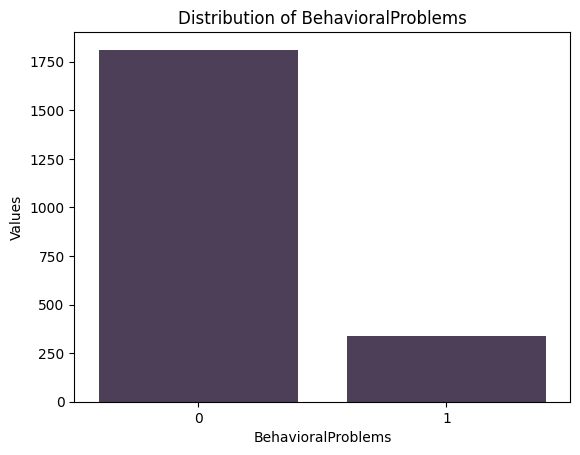

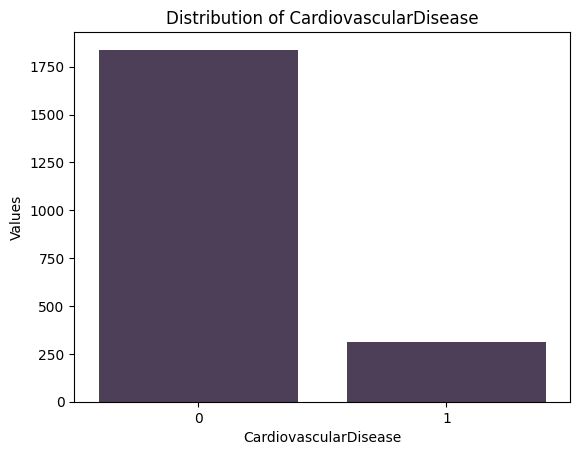

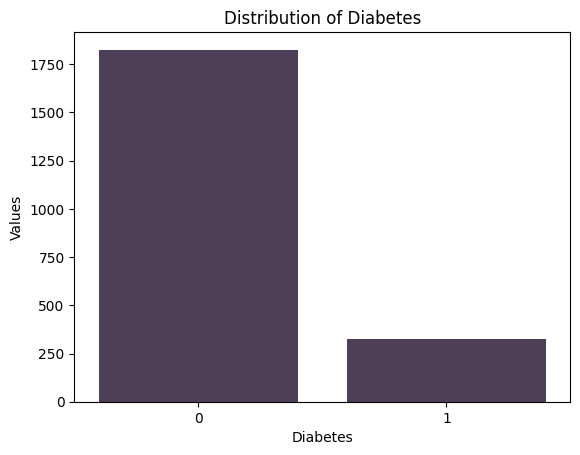

In [68]:
count_plot(demen_df, countplot_data)

Bivariate Analysis

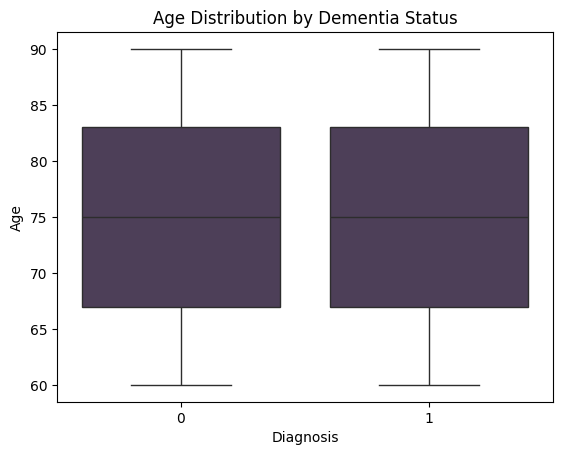

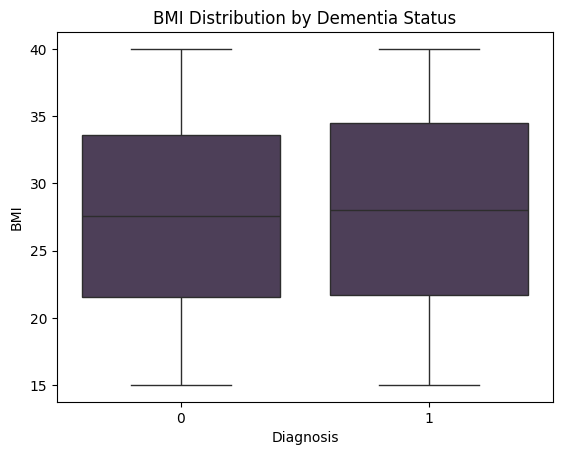

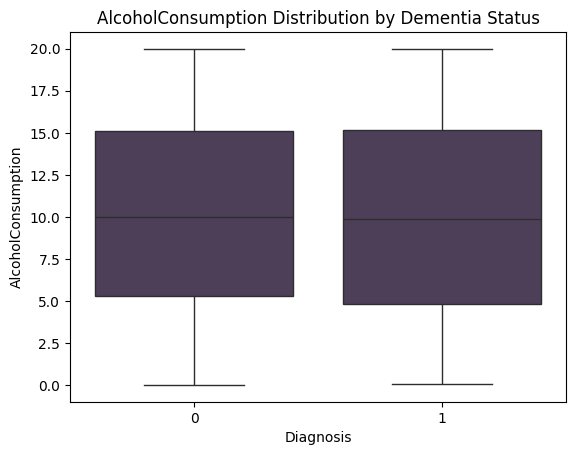

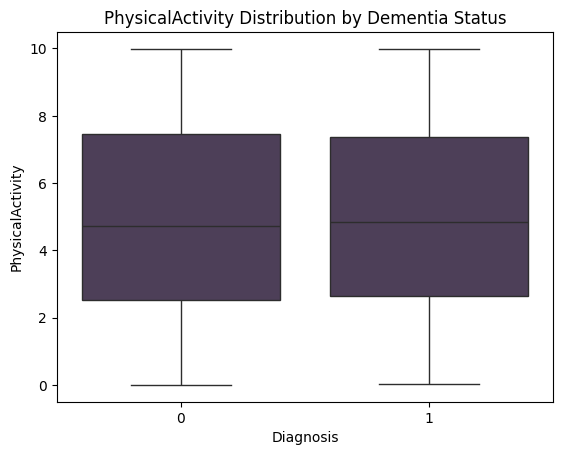

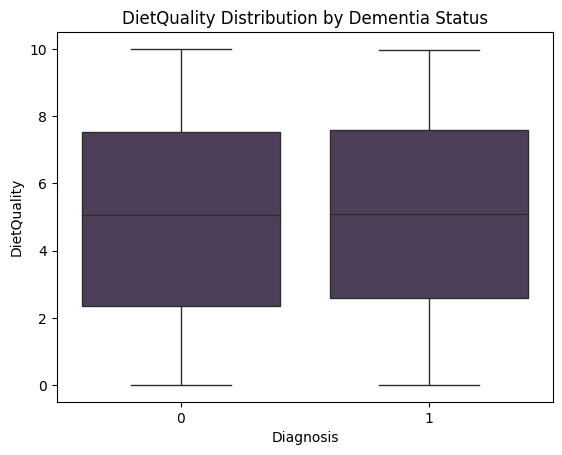

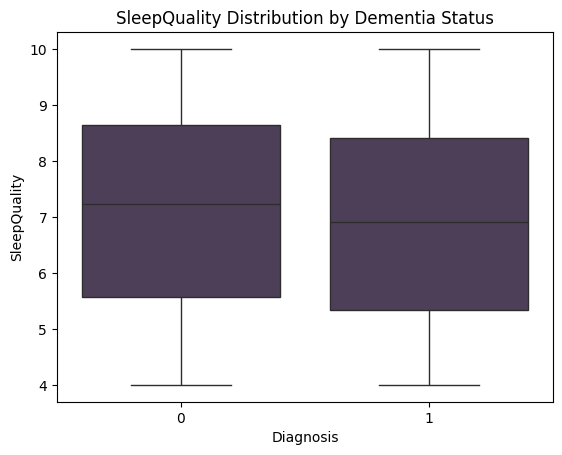

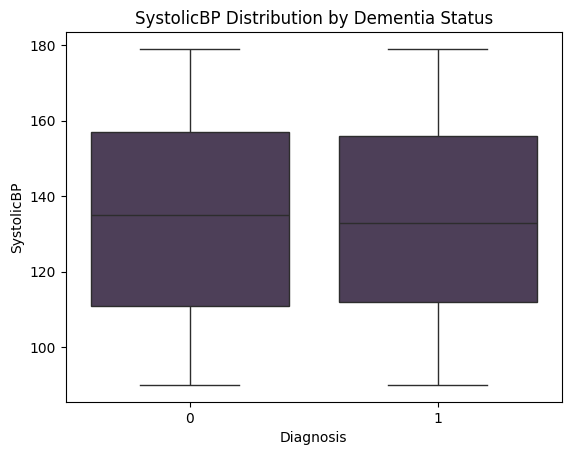

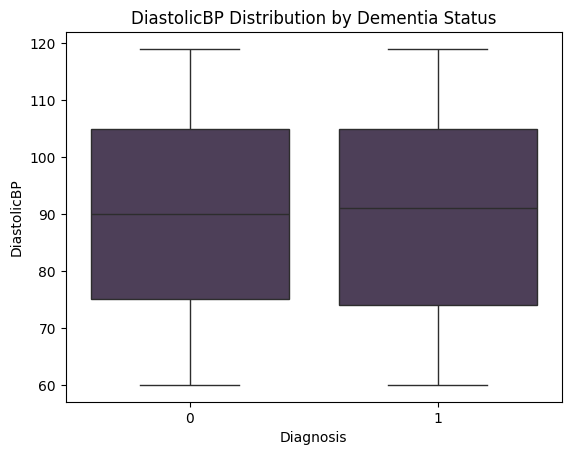

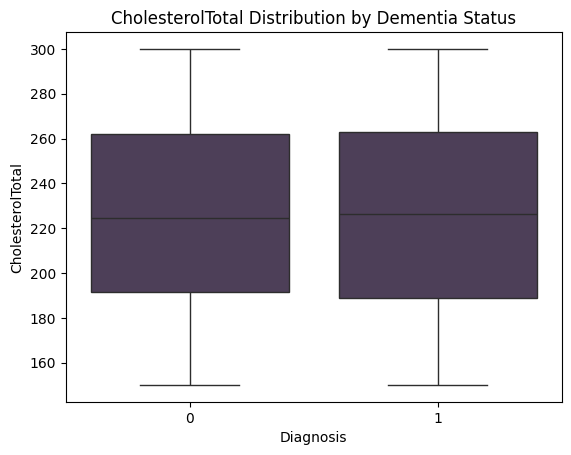

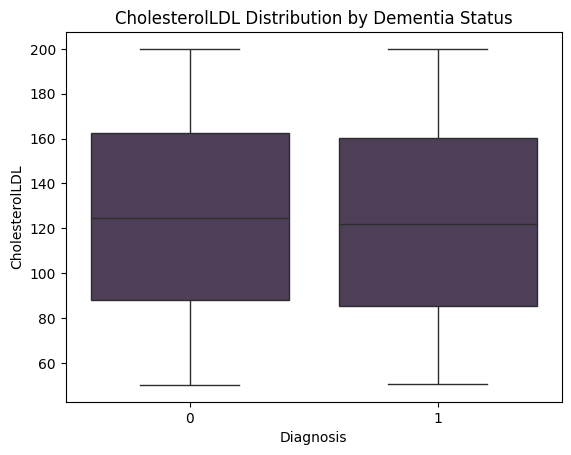

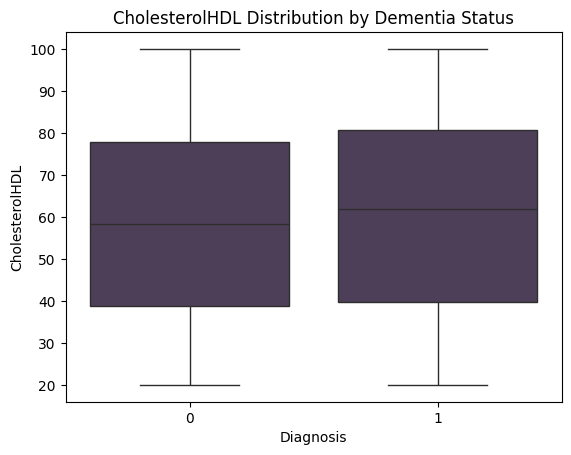

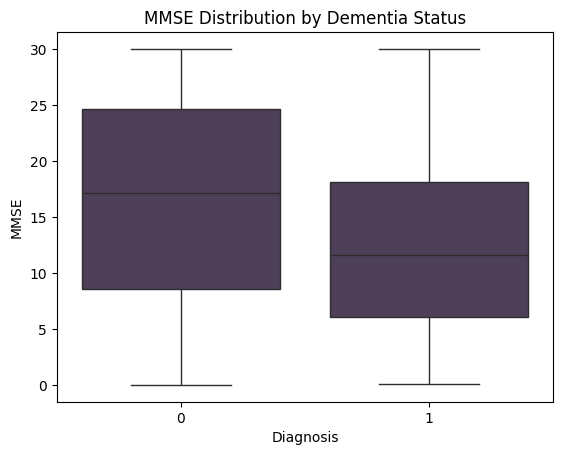

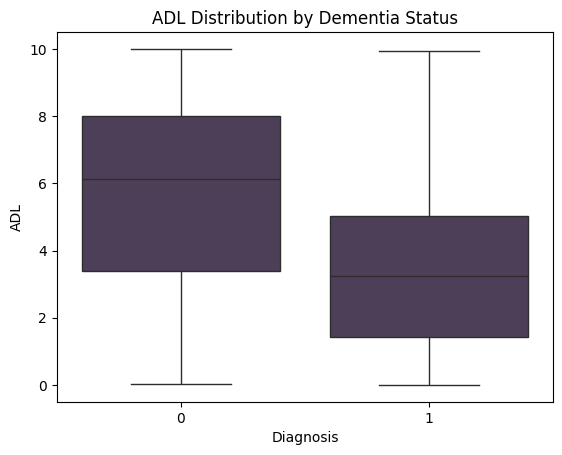

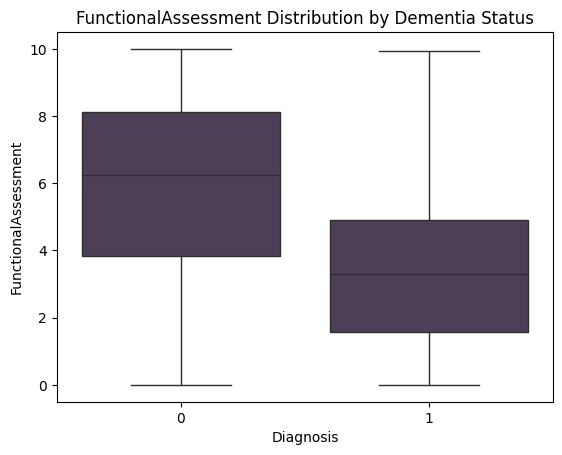

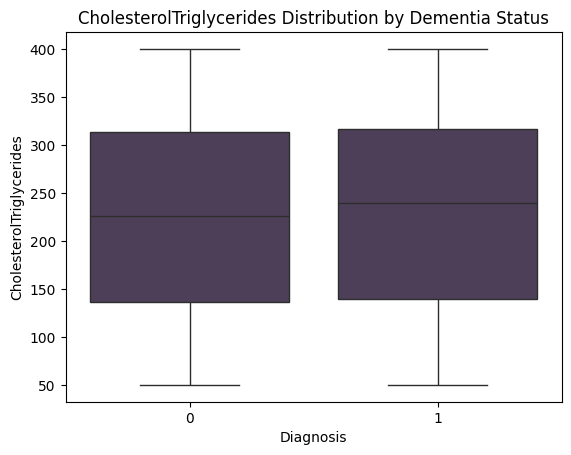

In [69]:
list1 = ['Age', 'BMI','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality','SystolicBP',
         'DiastolicBP','CholesterolTotal','CholesterolLDL','CholesterolHDL','MMSE','ADL','FunctionalAssessment',
         'CholesterolTriglycerides']
for col in list1:
    sns.boxplot(demen_df, x="Diagnosis", y=col, color = '#4d3b5c')
    plt.title(f'{col} Distribution by Dementia Status')
    plt.show()

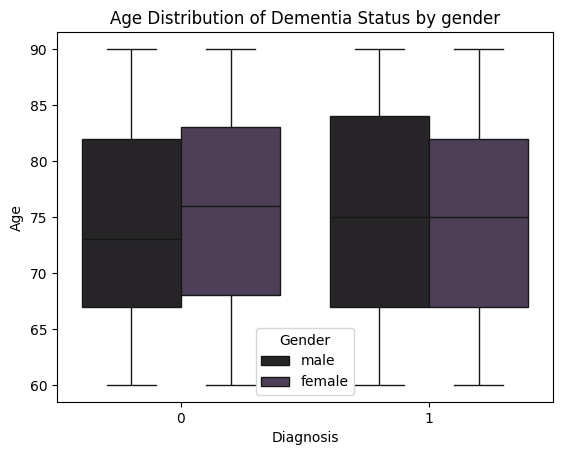

In [70]:
ax = sns.boxplot(demen_df,x="Diagnosis", y="Age",hue="Gender", color = '#4d3b5c')
plt.title('Age Distribution of Dementia Status by gender')
handles, labels = ax.get_legend_handles_labels()
labels = ['male' if label == '0' else 'female' for label in labels]
ax.legend(handles, labels, title='Gender')


plt.show()

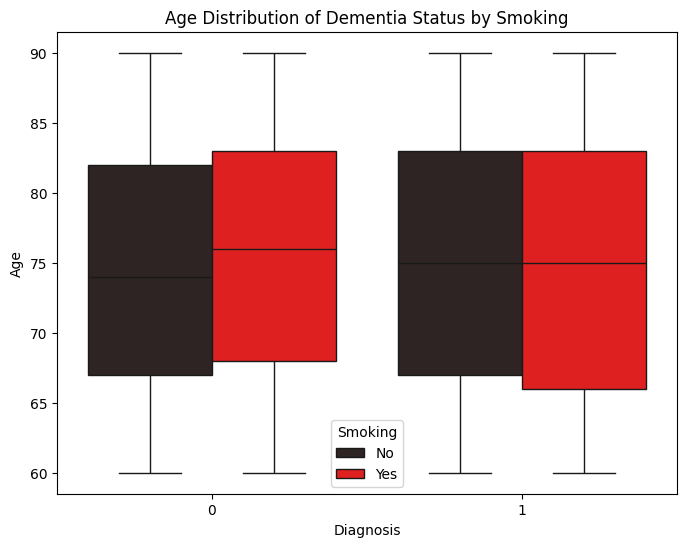

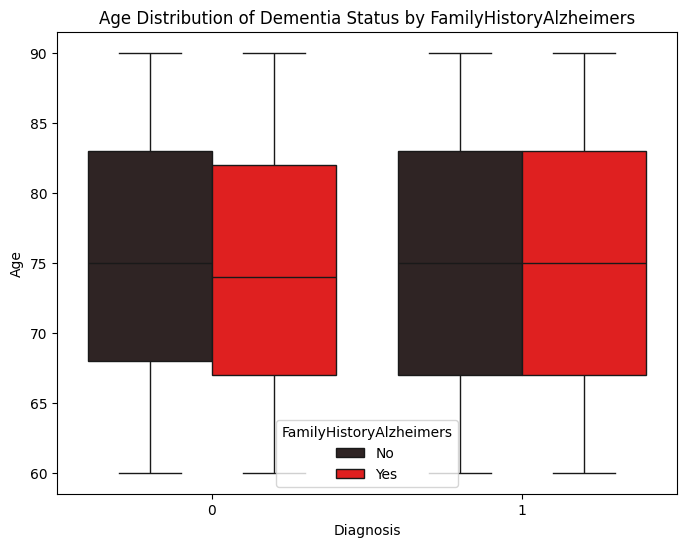

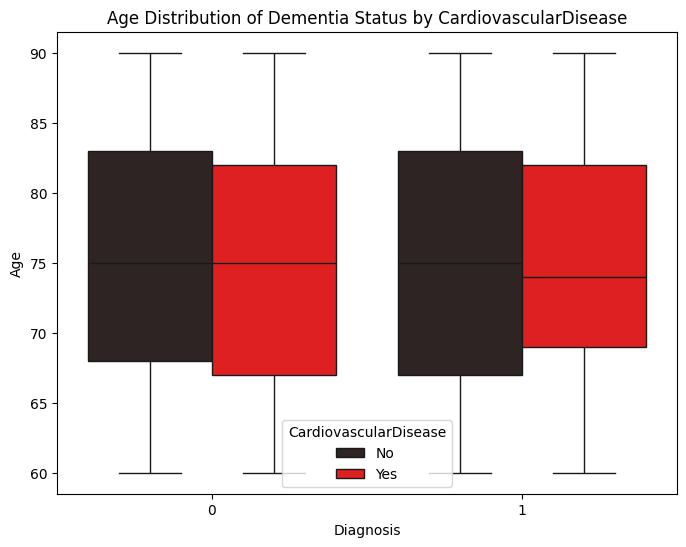

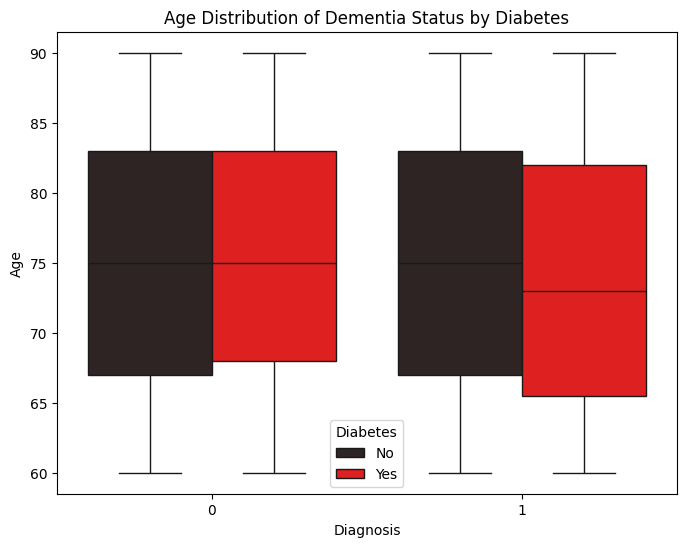

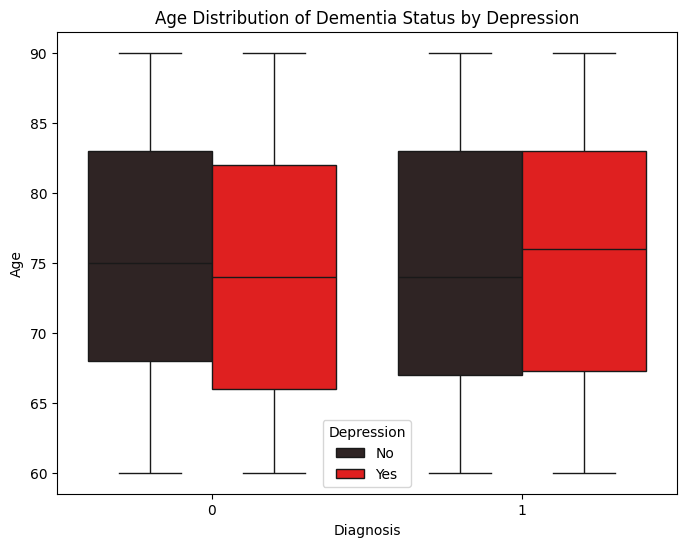

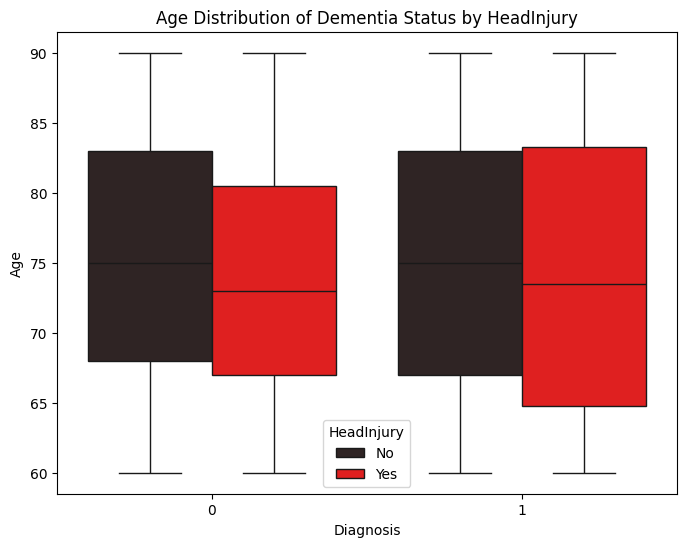

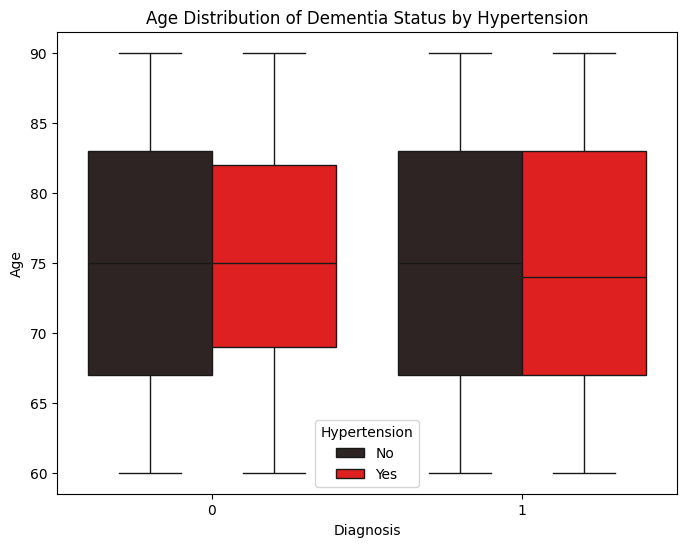

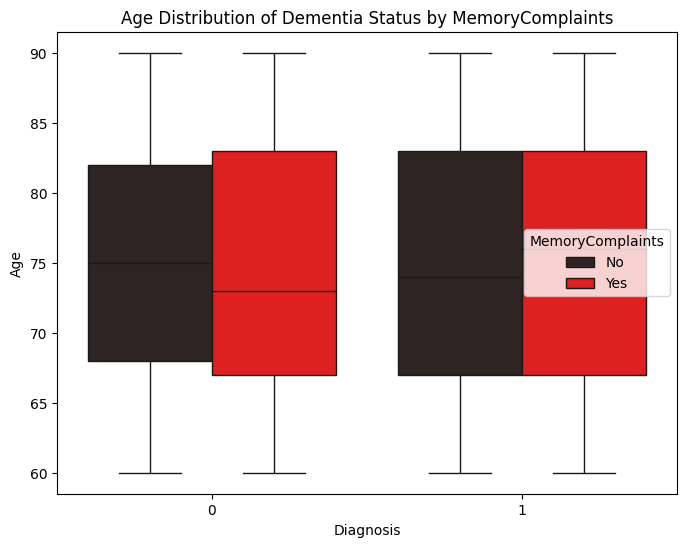

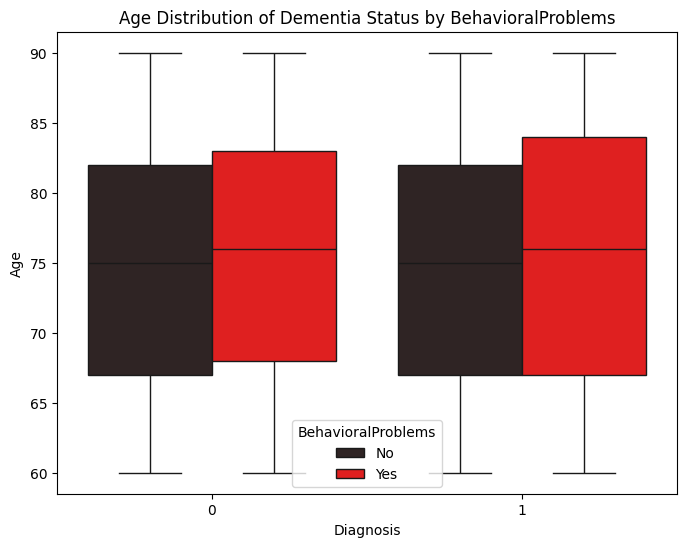

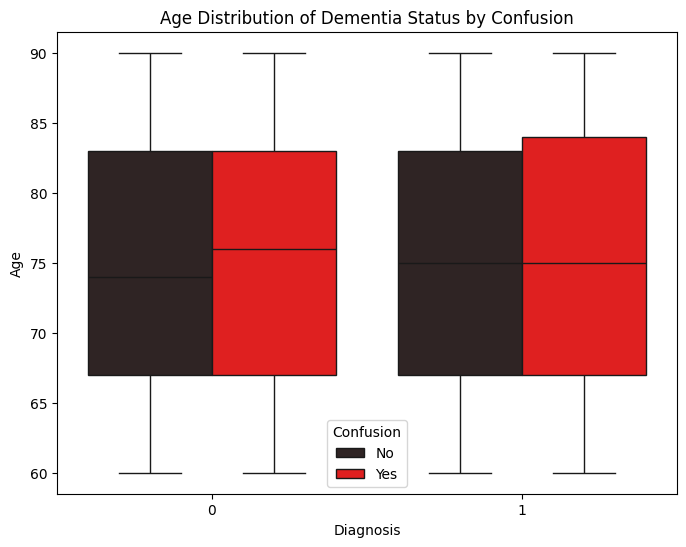

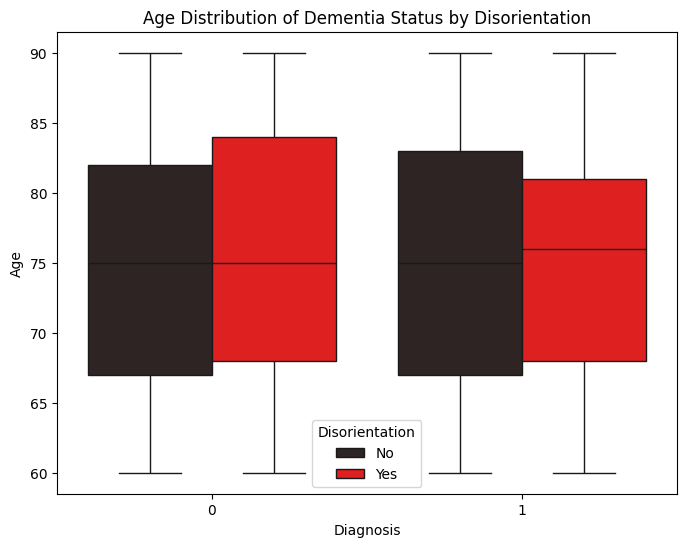

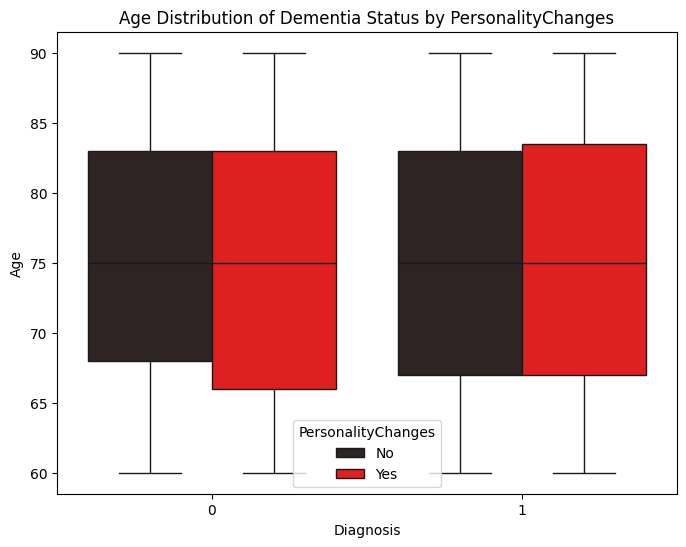

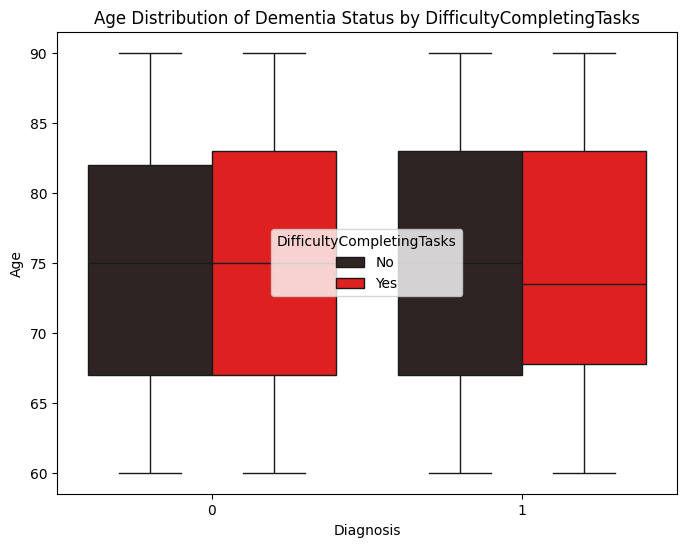

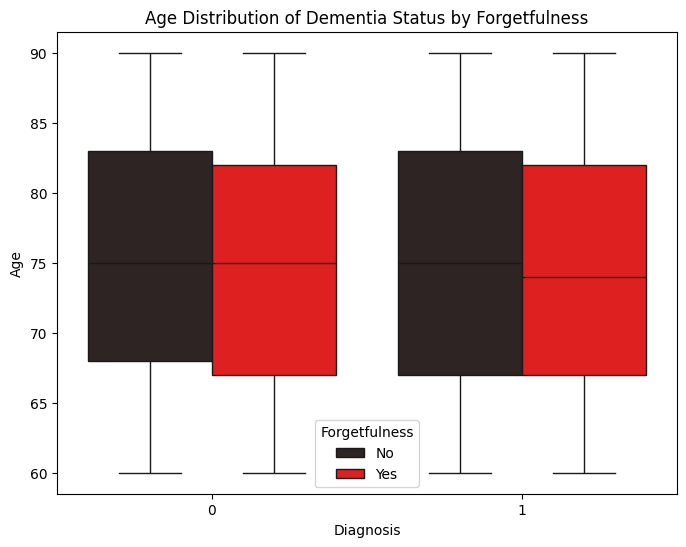

In [71]:
list2 = ["Smoking","FamilyHistoryAlzheimers","CardiovascularDisease","Diabetes","Depression",
         "HeadInjury","Hypertension","MemoryComplaints","BehavioralProblems","Confusion","Disorientation",
         "PersonalityChanges","DifficultyCompletingTasks","Forgetfulness"]
for col in list2:
    plt.figure(figsize = (8,6))
    ax = sns.boxplot(demen_df,x="Diagnosis", y="Age",hue=col,  color = 'Red')
    plt.title(f'Age Distribution of Dementia Status by {col}')
    handles, labels = ax.get_legend_handles_labels()
    labels = ['No' if label == '0' else 'Yes' for label in labels]
    ax.legend(handles, labels, title=col)


plt.show()

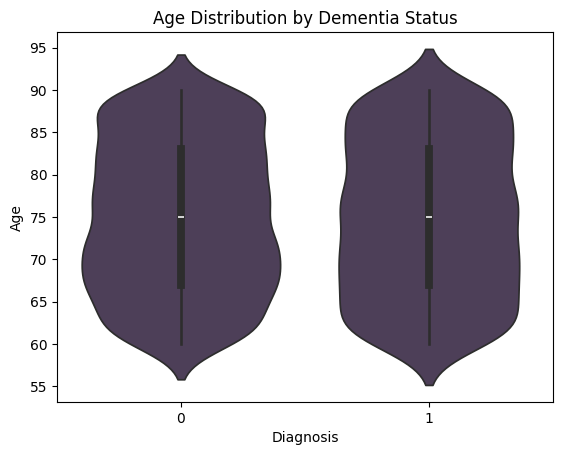

In [72]:
sns.violinplot(x='Diagnosis', y='Age', data=demen_df, color ='#4d3b5c')
plt.title('Age Distribution by Dementia Status')
plt.show()

   Diagnosis  Gender  count  total_count  percentage
0          0       0    675         1389   48.596112
1          0       1    714         1389   51.403888
2          1       0    386          760   50.789474
3          1       1    374          760   49.210526


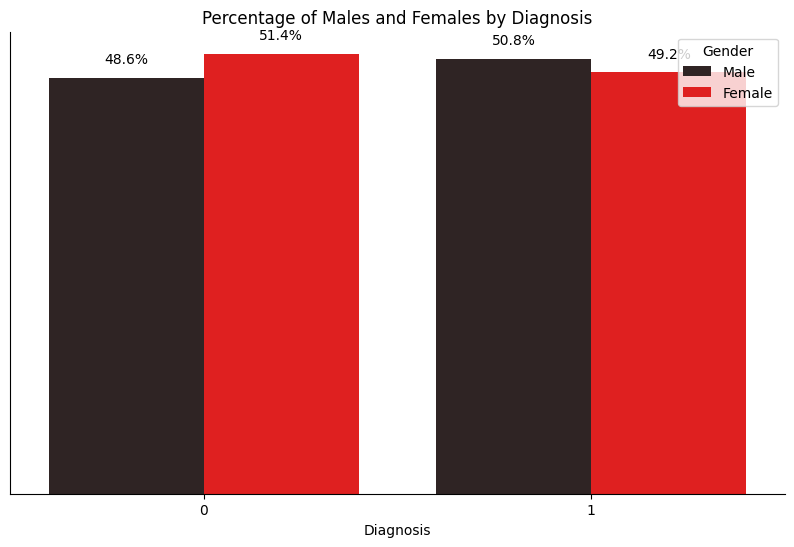

In [73]:
counts = demen_df.groupby(['Diagnosis', 'Gender']).size().reset_index(name='count')
total_counts = counts.groupby('Diagnosis')['count'].sum().reset_index(name='total_count')
percentages = counts.merge(total_counts, on='Diagnosis')
percentages['percentage'] = 100 * percentages['count'] / percentages['total_count']

print(percentages)
percentages['Gender'] = percentages['Gender'].map({1: 'Female', 0: 'Male'})

# Creating the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=percentages, x='Diagnosis', y='percentage', hue='Gender', color = 'red')
ax.set_title('Percentage of Males and Females by Diagnosis')

ax.set(ylabel='')
ax.set(yticks=[])
ax.tick_params(left=False)

# Removing the black line surrounding the chart
sns.despine()

# Adding percentage labels on the outside end of the bars
for p in ax.patches:
    height = p.get_height()  # get bar height
    if height > 0:  # Skipping the annotation for bars with height 0
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', 
                    xytext=(0, 8), 
                    textcoords='offset points')

# Showing the plot
plt.show()

   Diagnosis  Ethnicity  count  total_count  percentage
0          0          0    815         1389   58.675306
1          0          1    308         1389   22.174226
2          0          2    122         1389    8.783297
3          0          3    144         1389   10.367171
4          1          0    463          760   60.921053
5          1          1    146          760   19.210526
6          1          2     84          760   11.052632
7          1          3     67          760    8.815789


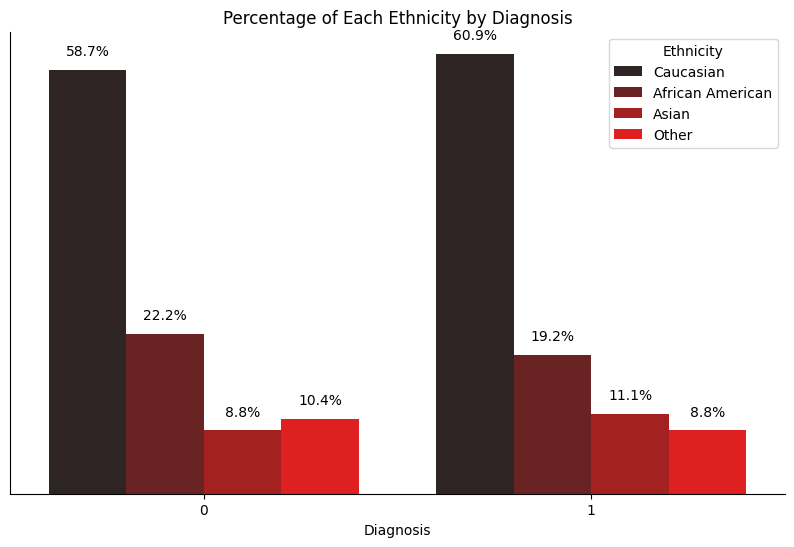

In [74]:

counts = demen_df.groupby(['Diagnosis', 'Ethnicity']).size().reset_index(name='count')
total_counts = counts.groupby('Diagnosis')['count'].sum().reset_index(name='total_count')
percentages = counts.merge(total_counts, on='Diagnosis')
percentages['percentage'] = 100 * percentages['count'] / percentages['total_count']

print(percentages)
percentages['Ethnicity'] = percentages['Ethnicity'].map({0: 'Caucasian', 1: 'African American',2: 'Asian', 3: 'Other'})

# Creating the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=percentages, x='Diagnosis', y='percentage', hue='Ethnicity', color = 'Red')
ax.set_title('Percentage of Each Ethnicity by Diagnosis')

ax.set(ylabel='')
ax.set(yticks=[])
ax.tick_params(left=False)

# Removing the black line surrounding the chart
sns.despine()

# Adding percentage labels on the outside end of the bars
for p in ax.patches:
    height = p.get_height()  # get bar height
    if height > 0:  # Skipping the annotation for bars with height 0
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', 
                    xytext=(0, 8), 
                    textcoords='offset points')

# Showing the plot
plt.show()

   Diagnosis  EducationLevel  count  total_count  percentage
0          0               0    272         1389   19.582433
1          0               1    552         1389   39.740821
2          0               2    419         1389   30.165587
3          0               3    146         1389   10.511159
4          1               0    174          760   22.894737
5          1               1    302          760   39.736842
6          1               2    217          760   28.552632
7          1               3     67          760    8.815789


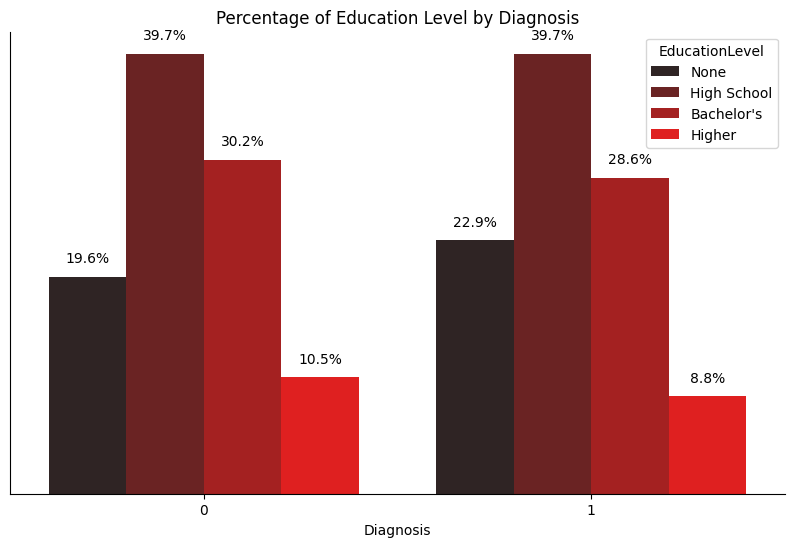

In [75]:

counts = demen_df.groupby(['Diagnosis', 'EducationLevel']).size().reset_index(name='count')
total_counts = counts.groupby('Diagnosis')['count'].sum().reset_index(name='total_count')
percentages = counts.merge(total_counts, on='Diagnosis')
percentages['percentage'] = 100 * percentages['count'] / percentages['total_count']

print(percentages)
percentages['EducationLevel'] = percentages['EducationLevel'].map({0: 'None', 1: 'High School',2: "Bachelor's", 3: 'Higher'})

# Creating the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=percentages, x='Diagnosis', y='percentage', hue='EducationLevel', color = 'Red')
ax.set_title('Percentage of Education Level by Diagnosis')

ax.set(ylabel='')
ax.set(yticks=[])
ax.tick_params(left=False)

# Removing the black line surrounding the chart
sns.despine()

# Adding percentage labels on the outside end of the bars
for p in ax.patches:
    height = p.get_height()  # get bar height
    if height > 0:  # Skipping the annotation for bars with height 0
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', 
                    xytext=(0, 8), 
                    textcoords='offset points')

# Showing the plot
plt.show()

   Diagnosis  Confusion  count  total_count  percentage
0          0          0   1096         1389   78.905688
1          0          1    293         1389   21.094312
2          1          0    612          760   80.526316
3          1          1    148          760   19.473684


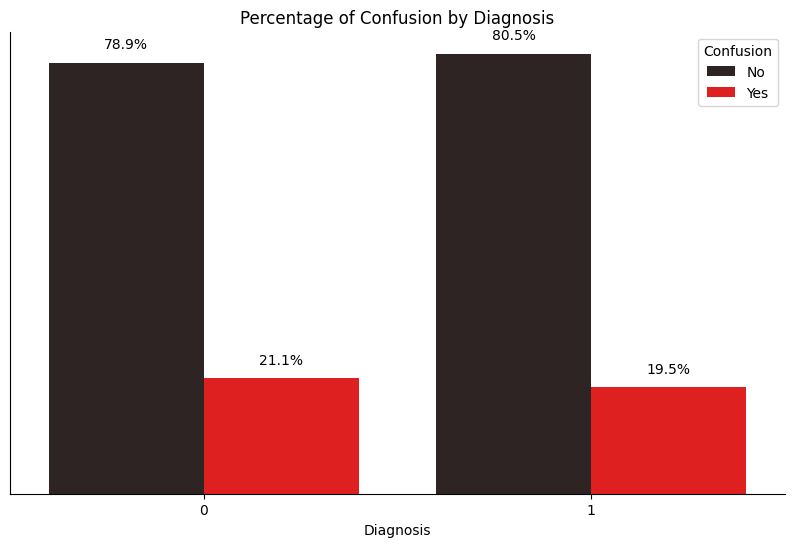

In [76]:

counts = demen_df.groupby(['Diagnosis', "Confusion"]).size().reset_index(name='count')
total_counts = counts.groupby('Diagnosis')['count'].sum().reset_index(name='total_count')
percentages = counts.merge(total_counts, on='Diagnosis')
percentages['percentage'] = 100 * percentages['count'] / percentages['total_count']

print(percentages)
percentages["Confusion"] = percentages["Confusion"].map({0: 'No', 1: 'Yes'})

# Creating the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=percentages, x='Diagnosis', y='percentage', hue="Confusion", color = 'Red')
ax.set_title('Percentage of Confusion by Diagnosis')

ax.set(ylabel='')
ax.set(yticks=[])
ax.tick_params(left=False)

# Removing the black line surrounding the chart
sns.despine()

# Adding percentage labels on the outside end of the bars
for p in ax.patches:
    height = p.get_height()  # get bar height
    if height > 0:  # Skipping the annotation for bars with height 0
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', 
                    xytext=(0, 8), 
                    textcoords='offset points')

# Showing the plot
plt.show()

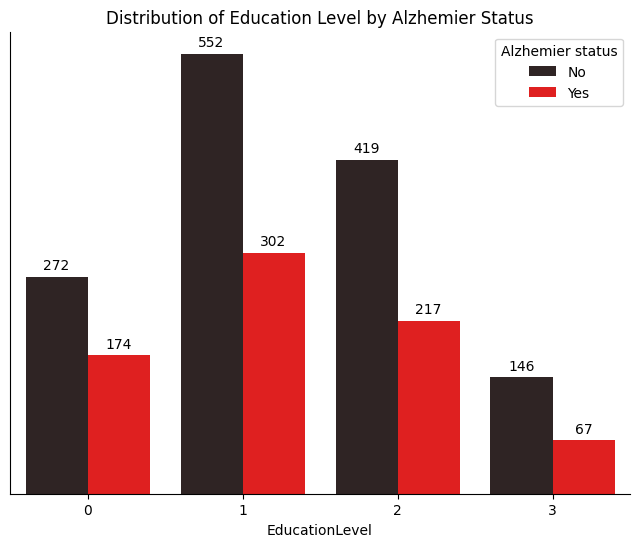

In [77]:

plt.figure(figsize= (8,6))
ax = sns.countplot(demen_df, hue="Diagnosis", x="EducationLevel",  color = 'red')

ax.set(ylabel='')
ax.set(yticks=[])
ax.tick_params(left=False)

# Remove the black line surrounding the chart
sns.despine()

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Skip the annotation for bars with height 0
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    xytext=(0, 8), 
                    textcoords='offset points')

plt.title('Distribution of Education Level by Alzhemier Status')
handles, labels = ax.get_legend_handles_labels()
labels = ['Yes' if label == '1' else 'No' for label in labels]
ax.legend(handles, labels, title='Alzhemier status')
plt.show()

Multivariate analysis

In [78]:
demen_df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

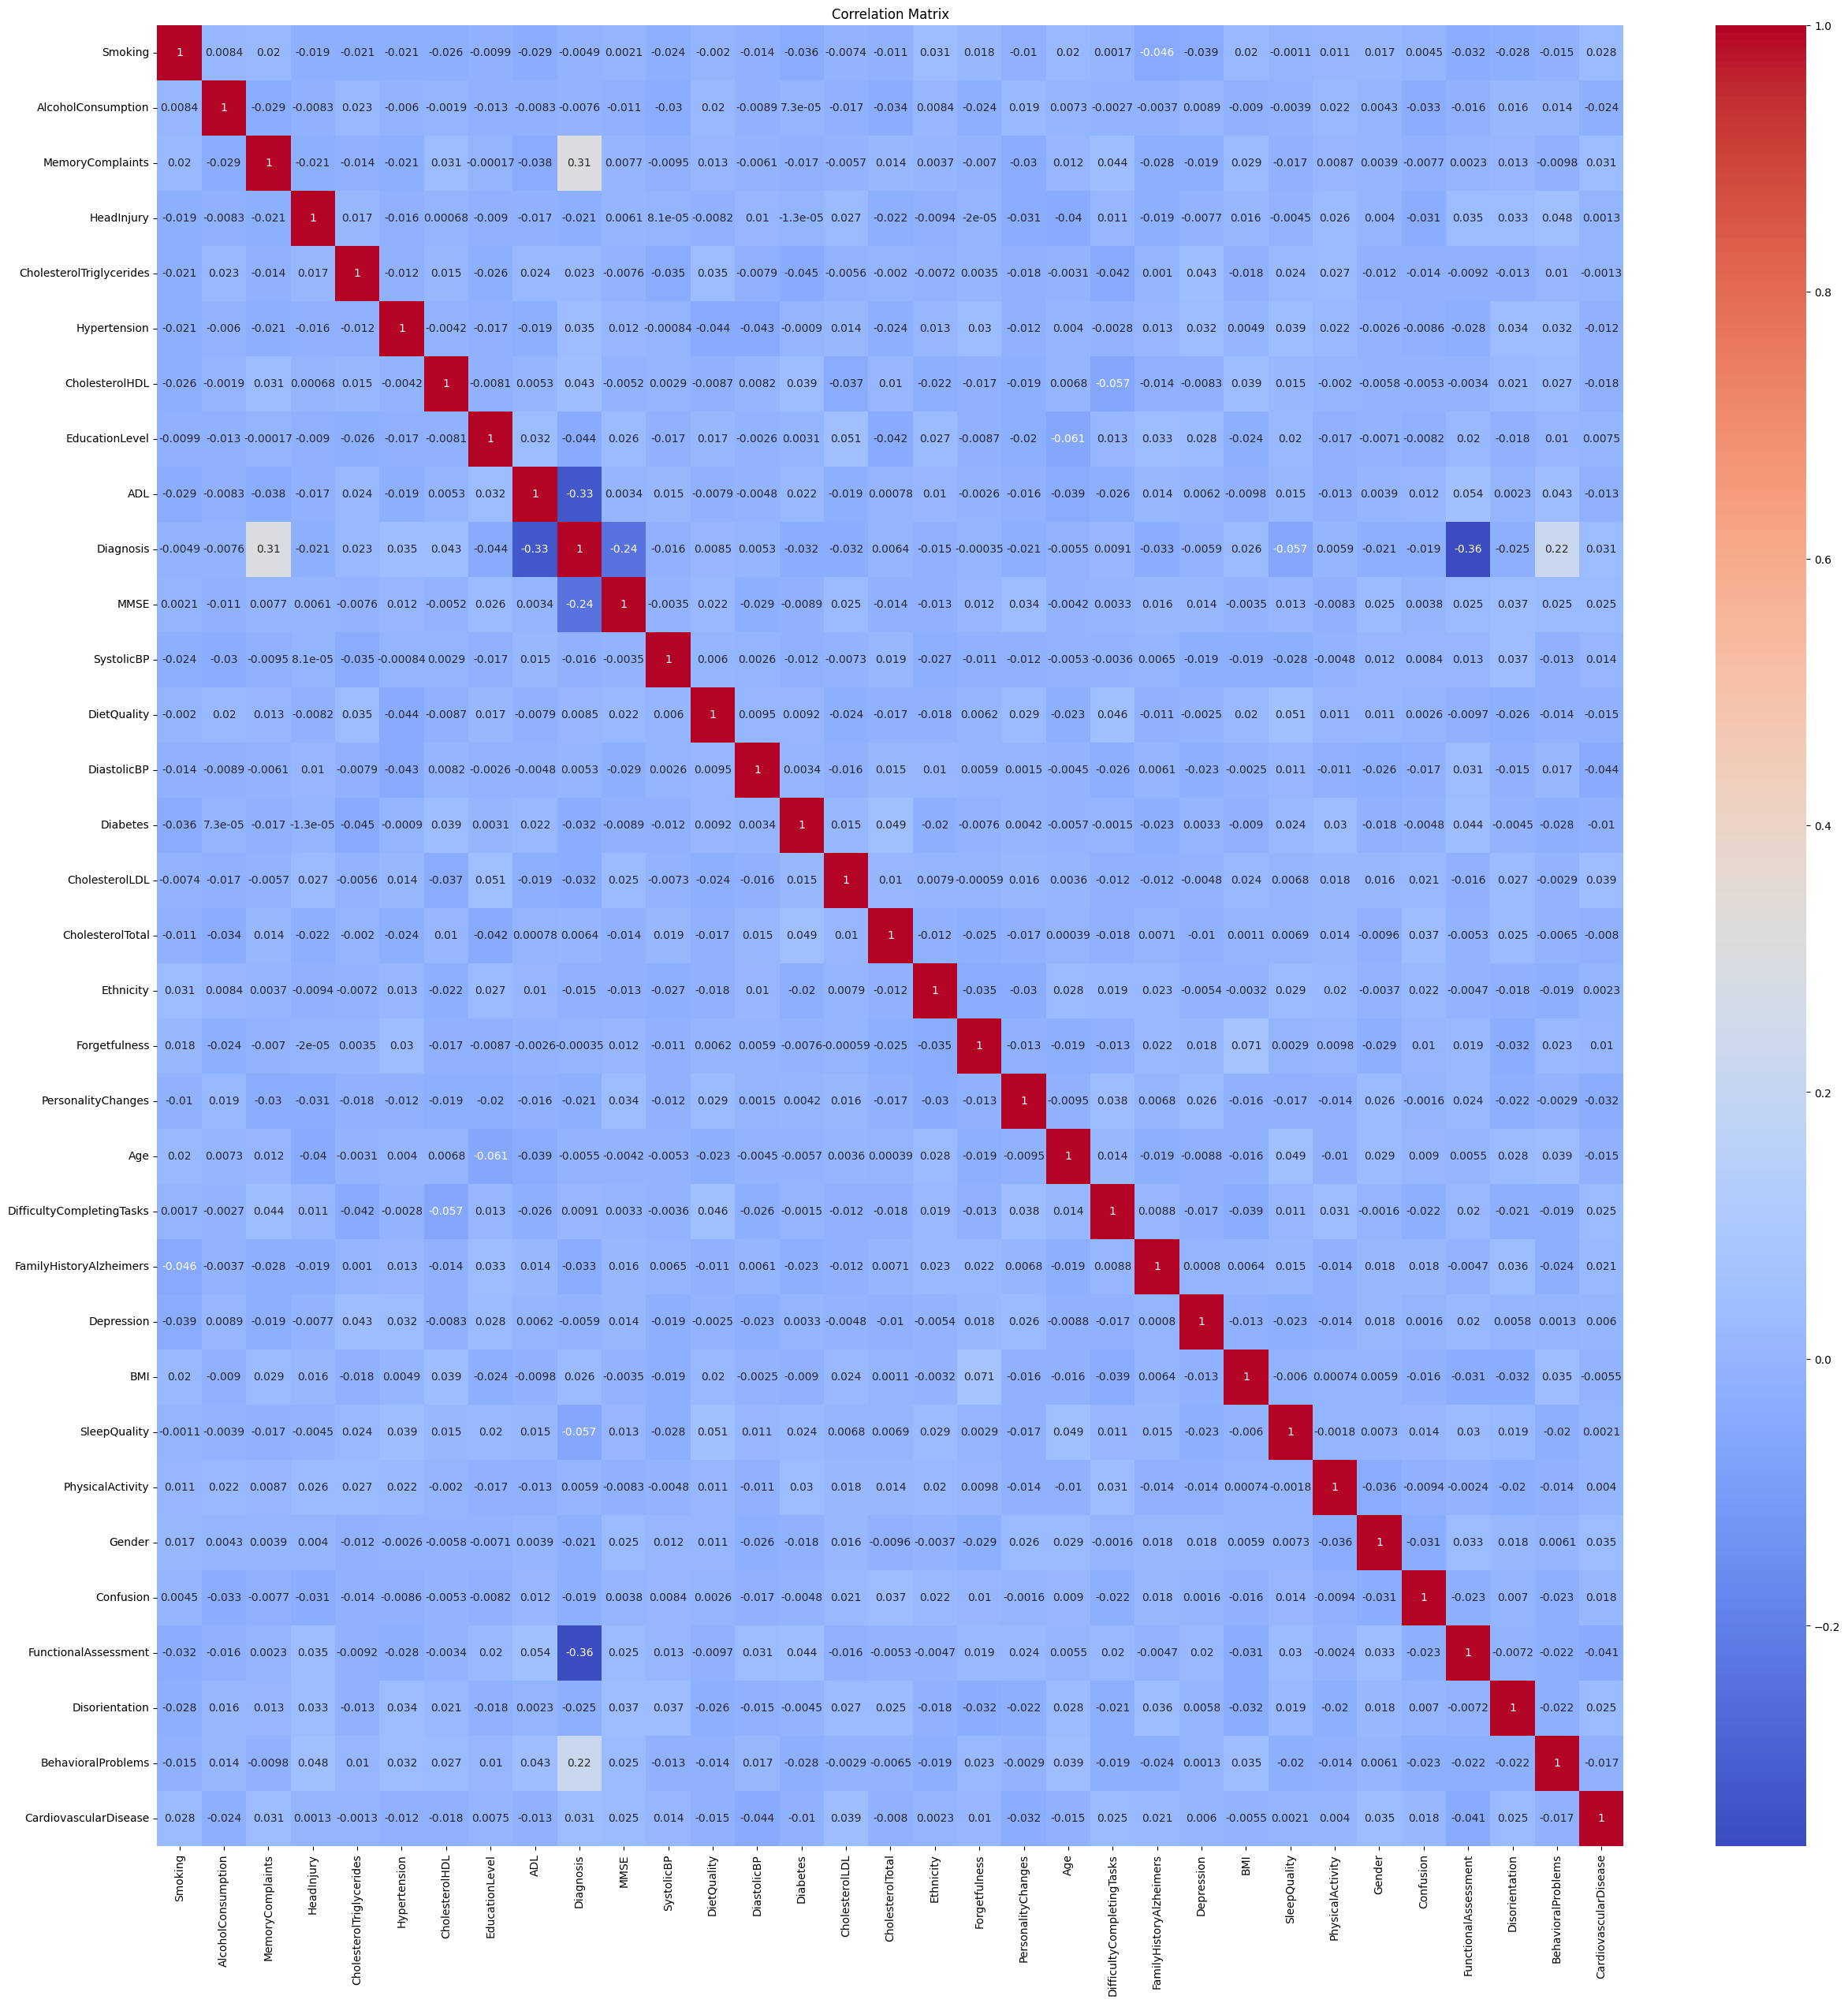

In [79]:
numerical_cols = list(set(demen_df.columns)- set(['PatientID','DoctorInCharge' ]))
plt.figure(figsize = (30,30))
correlation_matrix = demen_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

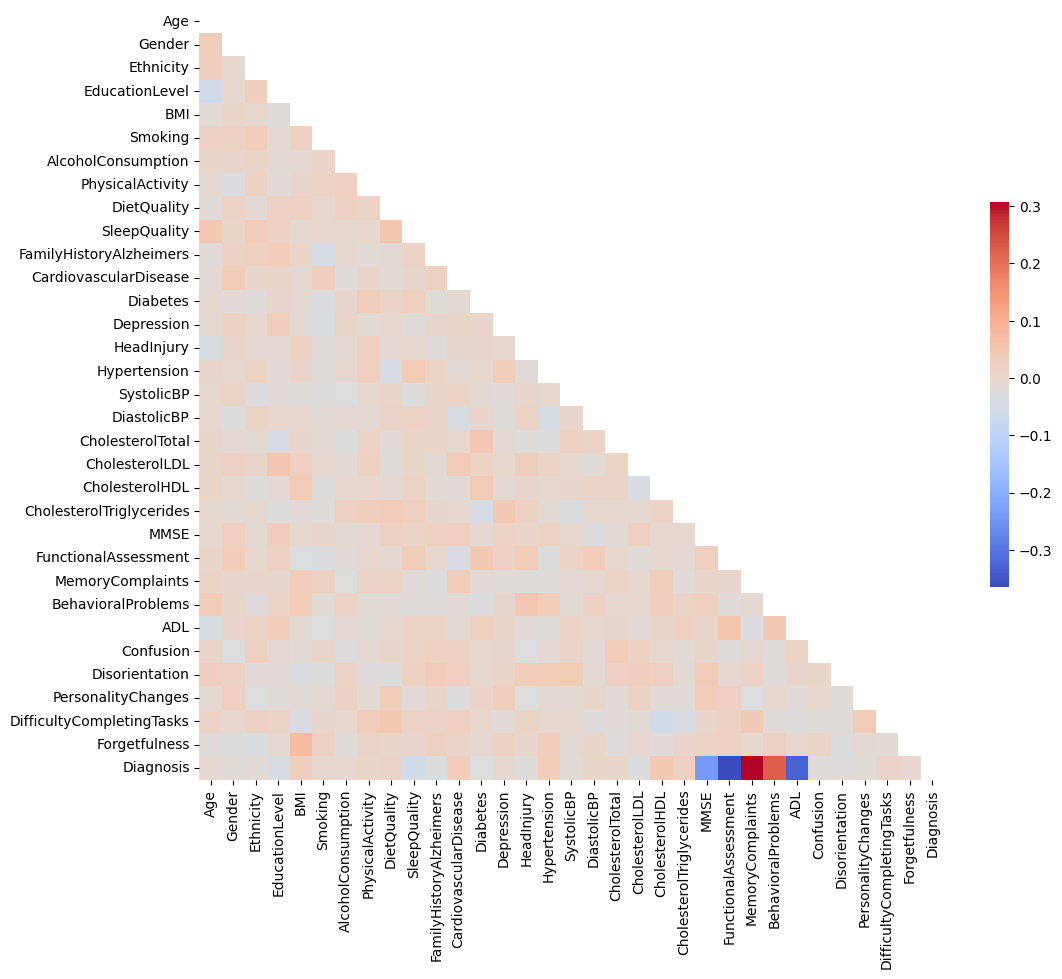

In [80]:
mask = np.triu(np.ones_like(demen_df.drop(columns= ['PatientID', 'DoctorInCharge']).corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(demen_df.drop(columns= ['PatientID', 'DoctorInCharge']).corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

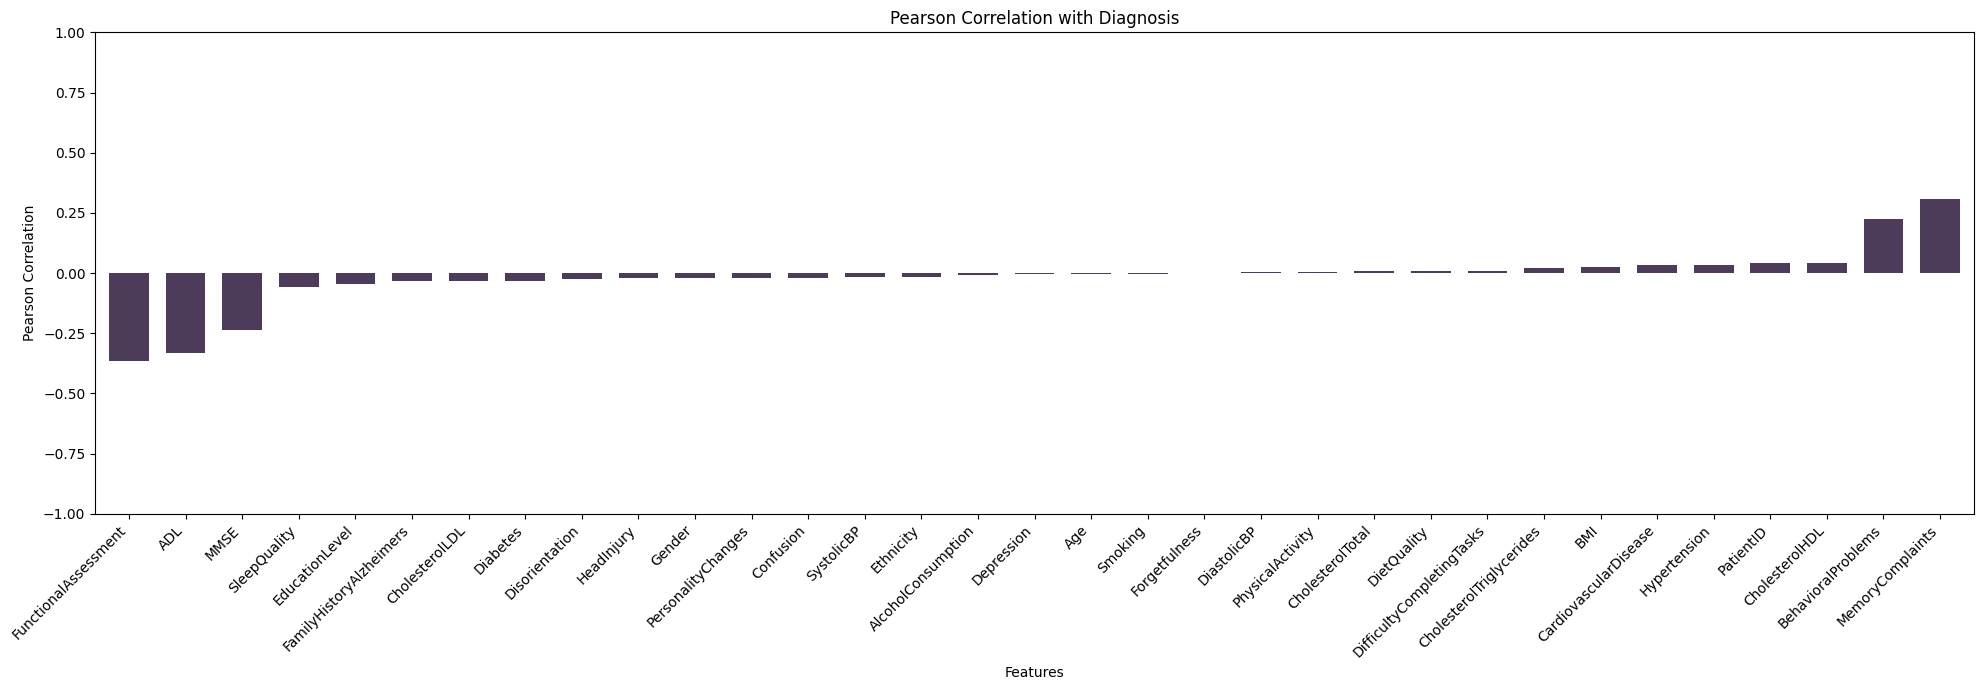

In [81]:
correlations = demen_df.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7, color= '#4d3b5c')

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Diagnosis')
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

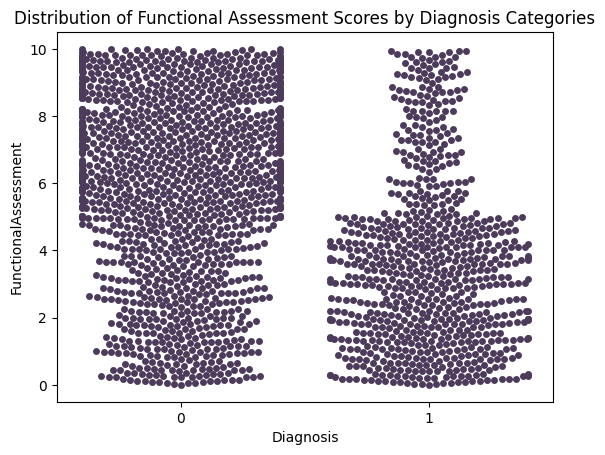

In [82]:
sns.swarmplot(data=demen_df, y='FunctionalAssessment', x='Diagnosis', color = '#4d3b5c')        
plt.title(f'Distribution of Functional Assessment Scores by Diagnosis Categories')
plt.show()

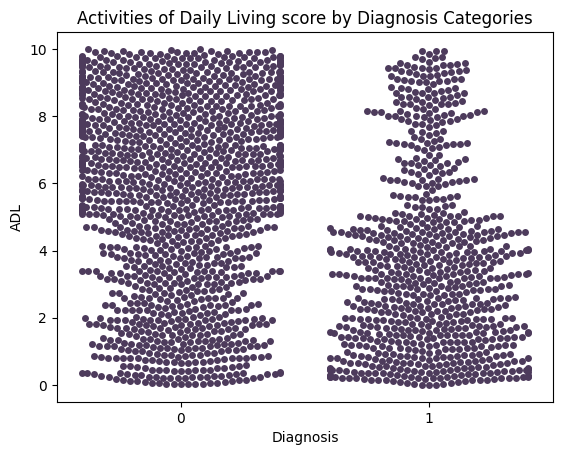

In [83]:
sns.swarmplot(data=demen_df, y='ADL', x='Diagnosis', color = '#4d3b5c')        
plt.title(f'Activities of Daily Living score by Diagnosis Categories')
plt.show()

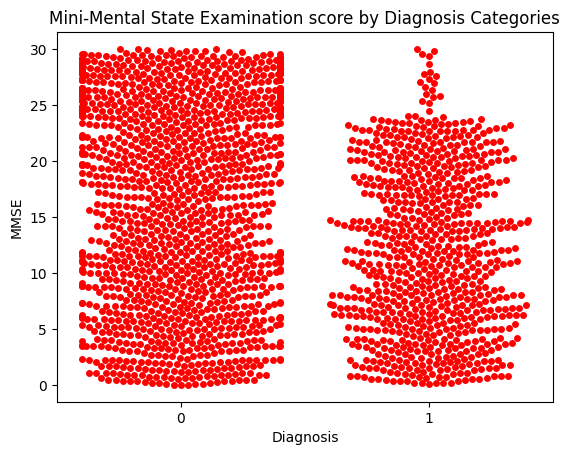

In [84]:
sns.swarmplot(data=demen_df, y='MMSE', x='Diagnosis', color = 'red')        
plt.title(f'Mini-Mental State Examination score by Diagnosis Categories')
plt.show()

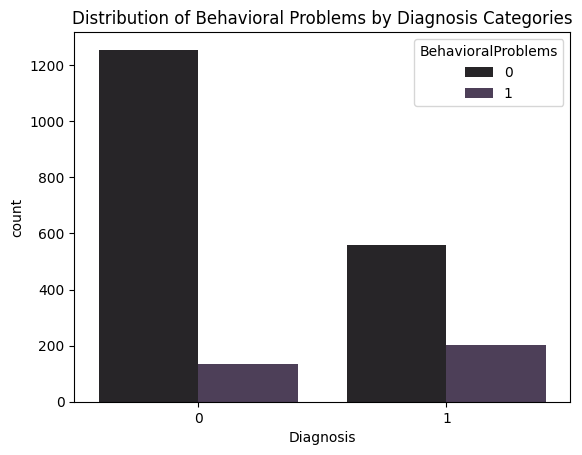

In [85]:
sns.countplot(data=demen_df, x='Diagnosis', hue='BehavioralProblems', color = '#4d3b5c')
plt.title(f'Distribution of Behavioral Problems by Diagnosis Categories')
plt.show()

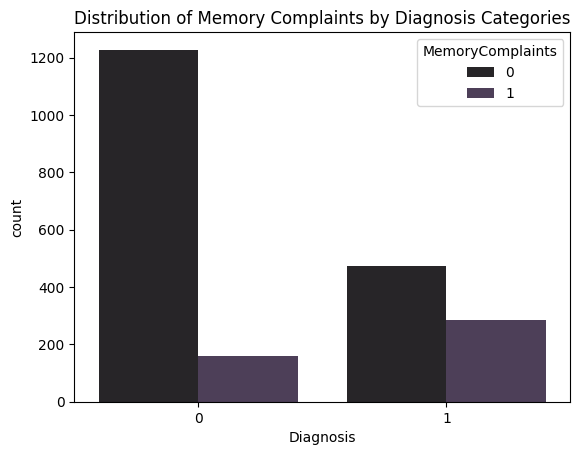

In [86]:
sns.countplot(data=demen_df, x='Diagnosis', hue='MemoryComplaints', color = '#4d3b5c')
plt.title(f'Distribution of Memory Complaints by Diagnosis Categories')
plt.show()

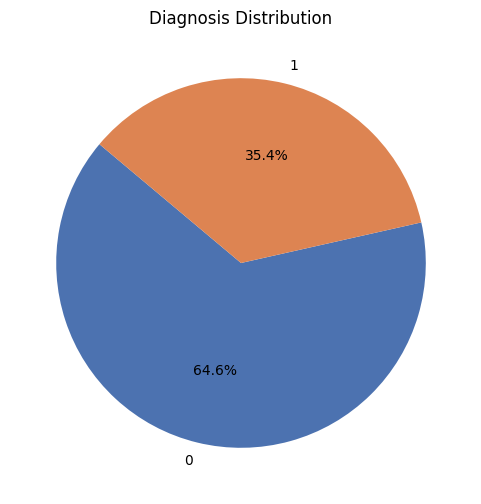

In [87]:
categories = [0, 1]
counts = demen_df.Diagnosis.value_counts().tolist()

# Choose a color palette from Seaborn for the pie chart
colors = sns.color_palette('deep')

# Plot the pie chart with the counts of each response category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

## Data Preprocessing 
- missing values
- duplicates 


In [88]:
demen_df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [89]:
demen_df.duplicated().sum()

0

In [90]:
demen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [91]:
demen_df.nunique()

PatientID                    2149
Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation

In [92]:
demen_df.drop(columns = ['PatientID', 'DoctorInCharge'], inplace = True)

In [93]:
demen_df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


## Feature engineering

In [94]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

demen_df['BMICategory'] = demen_df['BMI'].apply(categorize_bmi)

bmi_category_mapping = {
    'Underweight': 0,
    'Normal': 1,
    'Overweight': 2,
    'Obese': 3
}
demen_df['BMICategory'] = demen_df['BMICategory'].map(bmi_category_mapping)

demen_df['LDL_to_HDL_ratio'] = demen_df['CholesterolLDL'] / demen_df['CholesterolHDL']           

Splitting the data 

In [95]:
X = demen_df.drop(columns = ['Diagnosis'])
y = demen_df['Diagnosis']


- Split the data into training and testing sets

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True)

Scaling/Normalization

In [97]:
columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
           'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 
           'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
           'FunctionalAssessment', 'ADL']


#normalize the columns
min_max_scaler = MinMaxScaler()
X_train[columns] = min_max_scaler.fit_transform(X_train[columns])
X_test[columns] = min_max_scaler.transform(X_test[columns]) 

In [98]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling 

## Pipeline with baseline models for training and evaluation
- xgboost 
- Decision tree
- random forest 
- Logistic regression
- catboost



In [99]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

In [100]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{name} Classification Report:\n{report}')

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       401
           1       0.86      0.84      0.85       244

    accuracy                           0.89       645
   macro avg       0.88      0.88      0.88       645
weighted avg       0.89      0.89      0.89       645

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       401
           1       0.95      0.78      0.86       244

    accuracy                           0.90       645
   macro avg       0.91      0.88      0.89       645
weighted avg       0.91      0.90      0.90       645

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       401
           1       0.79      0.70      0.74       244

    accuracy                           0.81       645
   macro av

## Retrain the best two models and evaluate them 
- cross validation 
- hyper parameter tuning 

In [105]:
models = {
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

param_grid = {
    'XGBoost': {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [10, 20, 30, 40],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'CatBoost': {
        'iterations': [100, 200, 300, 400],
        'depth': [4, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv = 5, n_jobs = -1, verbose = 2, scoring = 'f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{name} Classification Report:\n{report}\nBest Parameters: {grid_search.best_params_}\n')
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       401
           1       0.95      0.91      0.93       244

    accuracy                           0.95       645
   macro avg       0.95      0.94      0.94       645
weighted avg       0.95      0.95      0.95       645

Best Parameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 400}

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 400}
0.9166685581077516
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=Non

# Using Deep Learning Approach 
